## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I. Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


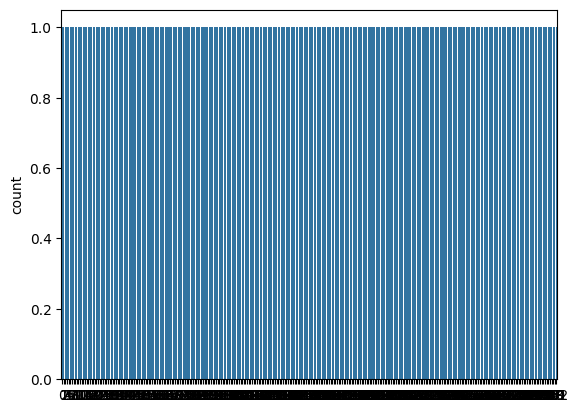

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

# 학습데이터 80%, 테스트 사이즈 20%로 데이터 분리
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# X_train, Y_train을 train_test_split 함수를 사용하여
# 훈련 데이터(X_train, Y_train)와 검증 데이터(X_val, Y_val)로 나눕니다.
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(193, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(193,)

In [ ]:
Y_test.shape


(61,)

In [ ]:
X_val.shape


(49, 13)

In [ ]:
Y_val.shape

(49,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

####첫 번째 Dense 레이어 : Dense(11, activation='relu', input_dim=11)
*   Dense(11): 이 레이어는 11개의 뉴런(유닛)을 갖는 완전 연결 레이어입니다. 레이어의 출력은 11개의 뉴런으로 구성됩니다.
*   activation='relu': 이 레이어는 ReLU(Rectified Linear Unit) 활성화 함수를 사용합니다. ReLU는 출력값을 0 이상으로 만들고, 음수 값을 0으로 변환하는 비선형 활성화 함수입니다. 이를 통해 비선형성을 모델에 추가합니다
*   input_dim=13: 이 레이어는 입력으로 13개의 특성을 받도록 설정되어 있습니다. 입력 데이터의 형상이 (batch_size, 13)이 됩니다. 여기서 batch_size는 한 번에 처리할 데이터 샘플의 수를 나타내며, 13은 각 샘플의 특성(피처) 수를 나타냅니다.

#### 두 번째 Dense 레이어 : model.add(Dense(1, activation='sigmoid'))
*   Dense(1): 이 레이어는 1개의 뉴런을 갖는 완전 연결 레이어입니다. 이 레이어의 출력은 1개의 뉴런으로 구성됩니다.
*   activation='sigmoid': 이 레이어는 시그모이드(Sigmoid) 활성화 함수를 사용합니다. 시그모이드는 출력값을 0과 1 사이로 변환합니다. 주로 이진 분류 문제에서 사용됩니다.

###전체적인 구조
입력 레이어: 첫 번째 Dense 레이어는 입력으로 13개의 특성을 받습니다.
은닉 레이어: 첫 번째 Dense 레이어는 11개의 뉴런을 가지며, ReLU 활성화 함수를 사용하여 입력 데이터를 처리합니다.
출력 레이어: 두 번째 Dense 레이어는 1개의 뉴런을 가지며, 시그모이드 활성화 함수를 사용하여 최종 출력을 생성합니다. 이 출력은 0과 1 사이의 값을 가지므로, 이진 분류 문제에 적합합니다.

##데이터 정규화

In [ ]:
# 데이터 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Early Stopping 추가

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 모델 정의
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(X_train_scaled, Y_train, epochs=300,
                    validation_data=(X_val_scaled, Y_val), callbacks=[early_stopping],verbose=0)


In [ ]:
# epoch=300일 때 모델 평가
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 14ms/step - loss: 0.3777 - accuracy: 0.8525
Test Loss: 0.3776969611644745
Test Accuracy: 0.8524590134620667


In [ ]:
# 훈련된 epoch 수 확인
optimal_epochs = len(history.history['loss'])
print(f"훈련된 epoch 수: {optimal_epochs}")


훈련된 epoch 수: 76


In [ ]:
# 모델 정의
model_es = Sequential()
model_es.add(Dense(11, activation='relu', input_dim=13))
model_es.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model_es.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련 (epoch=optimal_epochs로 수정)
history_es = model_es.fit(X_train_scaled, Y_train, epochs=optimal_epochs,
                          validation_data=(X_val_scaled, Y_val), callbacks=[early_stopping],verbose=0)

# 모델 평가
loss, accuracy = model_es.evaluate(X_test_scaled, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 10ms/step - loss: 0.3756 - accuracy: 0.9016
Test Loss: 0.37556764483451843
Test Accuracy: 0.9016393423080444


## VI. Output final score

In [ ]:
# scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
# algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")